In [250]:
from sympy import *
from dtumathtools import * 

In [251]:
# Define symbols
B_rem, R_o, R_i, r, θ = symbols('B_rem R_o R_i r θ')

# Define equations
B_r_I = B_rem * ln(R_o / R_i) * cos(θ)
B_θ_I = -B_rem * ln(R_o / R_i) * sin(θ)
B_r_II = B_rem * ln(R_o / r) * cos(θ)
B_θ_II = -B_rem * (ln(R_o / r) - 1) * sin(θ)

# Display equations
display(B_r_I)
display(B_θ_I)
display(B_r_II)
display(B_θ_II)

B_rem*log(R_o/R_i)*cos(θ)

-B_rem*log(R_o/R_i)*sin(θ)

B_rem*log(R_o/r)*cos(θ)

-B_rem*(log(R_o/r) - 1)*sin(θ)

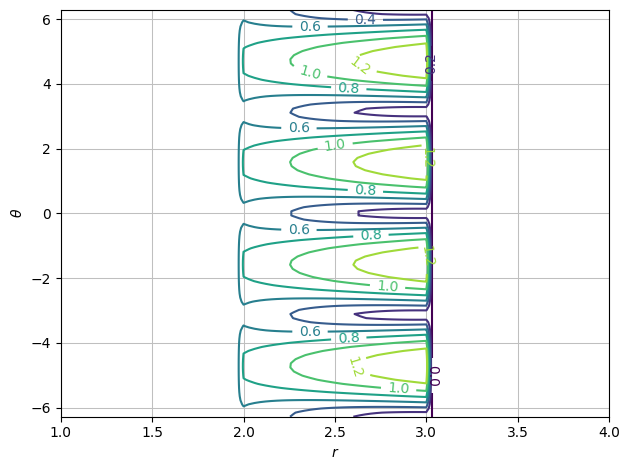

In [252]:
R_i_val = 2
R_o_val = 3
B_rem_val = 1.4

B = Piecewise(
    (sqrt(B_r_I**2+B_θ_I**2), (r < R_i_val)),
    (sqrt(B_r_II**2+B_θ_II**2), (And(r >= R_i_val, r <= R_o_val))),
    (0, (True))
    )


B_subs = B.subs({R_i: R_i_val, R_o: R_o_val, B_rem: B_rem_val})
pt = dtuplot.plot_contour(B_subs, (r,R_i_val-1,R_o_val+1), (θ,-2*pi,2*pi), is_filled=False)

In [253]:
x, y = symbols('x y')
e_r = Matrix([x, y])/sqrt(x**2+y**2)
e_θ = Matrix([-y, x])/sqrt(x**2+y**2)
e = Matrix.hstack(e_r, e_θ)
e


Matrix([
[x/sqrt(x**2 + y**2), -y/sqrt(x**2 + y**2)],
[y/sqrt(x**2 + y**2),  x/sqrt(x**2 + y**2)]])

In [254]:
θ_cartesian = atan(y/x)
r_cartesian = sqrt(x**2+y**2)

B_I_cartesian = B_r_I*e_r+B_θ_I*e_θ
B_I_cartesian=B_I_cartesian.subs([(θ, θ_cartesian), (r, r_cartesian)])
display(B_I_cartesian)

B_II_cartesian = B_r_II*e_r+B_θ_II*e_θ
B_II_cartesian=B_II_cartesian.subs([(θ, θ_cartesian), (r, r_cartesian)])
display(B_II_cartesian)

Matrix([
[B_rem*x*log(R_o/R_i)/(sqrt(1 + y**2/x**2)*sqrt(x**2 + y**2)) + B_rem*y**2*log(R_o/R_i)/(x*sqrt(1 + y**2/x**2)*sqrt(x**2 + y**2))],
[                                                                                                                               0]])

Matrix([
[B_rem*x*log(R_o/sqrt(x**2 + y**2))/(sqrt(1 + y**2/x**2)*sqrt(x**2 + y**2)) + B_rem*y**2*(log(R_o/sqrt(x**2 + y**2)) - 1)/(x*sqrt(1 + y**2/x**2)*sqrt(x**2 + y**2))],
[    -B_rem*y*(log(R_o/sqrt(x**2 + y**2)) - 1)/(sqrt(1 + y**2/x**2)*sqrt(x**2 + y**2)) + B_rem*y*log(R_o/sqrt(x**2 + y**2))/(sqrt(1 + y**2/x**2)*sqrt(x**2 + y**2))]])

Piecewise((sqrt(B_rem**2*log(R_o/R_i)**2), sqrt(x**2 + y**2) < 2), (sqrt(B_rem**2*(x**2*y**2 + (x**2*log(R_o/sqrt(x**2 + y**2)) + y**2*(log(R_o/sqrt(x**2 + y**2)) - 1))**2)/(x**2 + y**2)**2), (sqrt(x**2 + y**2) > 2) & (sqrt(x**2 + y**2) < 3)), (0, True))

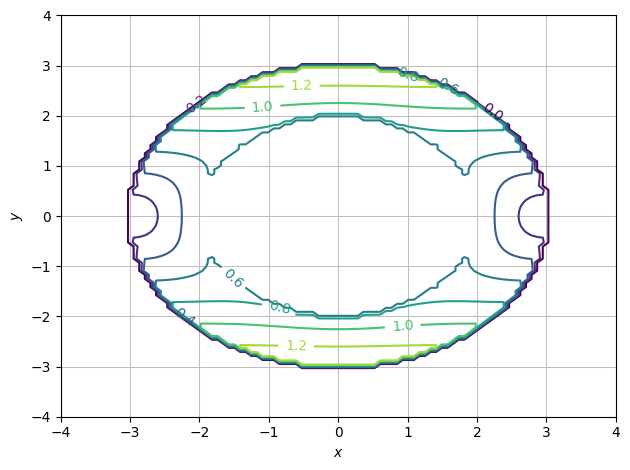

In [259]:
B_cartesian = Piecewise(
    (sqrt((B_I_cartesian.T*B_I_cartesian)[0]), (r_cartesian < R_i_val)),
    (sqrt((B_II_cartesian.T*B_II_cartesian)[0]), (And(r_cartesian > R_i_val, r_cartesian < R_o_val))),
    (0, (True))
    )

B_cartesian_subs = B_cartesian.subs({R_i: R_i_val, R_o: R_o_val, B_rem: B_rem_val})
display(simplify(B_cartesian))
pt = dtuplot.plot_contour(B_cartesian_subs, (x,-R_o_val-1,R_o_val+1), (y,-R_o_val-1,R_o_val+1), is_filled=False)